In [1]:
import os
import numpy as np
import pandas as pd
from collections import Counter 
from collections import OrderedDict
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
import xgboost as xg
from tabulate import tabulate
import warnings 
warnings.filterwarnings('ignore')

In [2]:
path = r"C:\Users\JOY\OneDrive\Desktop\CarPrice_Assignment.csv"
car_sales = pd.read_csv(path)
car_sales.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
car_sales.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [4]:
car_sales.shape

(205, 26)

In [5]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
car_sales.symboling = car_sales.symboling.astype('category')
car_sales.CarName = car_sales.CarName.astype('category')

In [7]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   car_ID            205 non-null    int64   
 1   symboling         205 non-null    category
 2   CarName           205 non-null    category
 3   fueltype          205 non-null    object  
 4   aspiration        205 non-null    object  
 5   doornumber        205 non-null    object  
 6   carbody           205 non-null    object  
 7   drivewheel        205 non-null    object  
 8   enginelocation    205 non-null    object  
 9   wheelbase         205 non-null    float64 
 10  carlength         205 non-null    float64 
 11  carwidth          205 non-null    float64 
 12  carheight         205 non-null    float64 
 13  curbweight        205 non-null    int64   
 14  enginetype        205 non-null    object  
 15  cylindernumber    205 non-null    object  
 16  enginesize        205 non-

In [8]:
car_sales.describe()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
#Feature Analysis
#Value Counts of the CarName
CarName_count = car_sales['CarName'].value_counts(dropna = False)
CarName_count

peugeot 504            6
toyota corona          6
toyota corolla         6
subaru dl              4
toyota mark ii         3
                      ..
honda prelude          1
honda civic 1500 gl    1
honda civic 1300       1
honda civic (auto)     1
vw rabbit              1
Name: CarName, Length: 147, dtype: int64

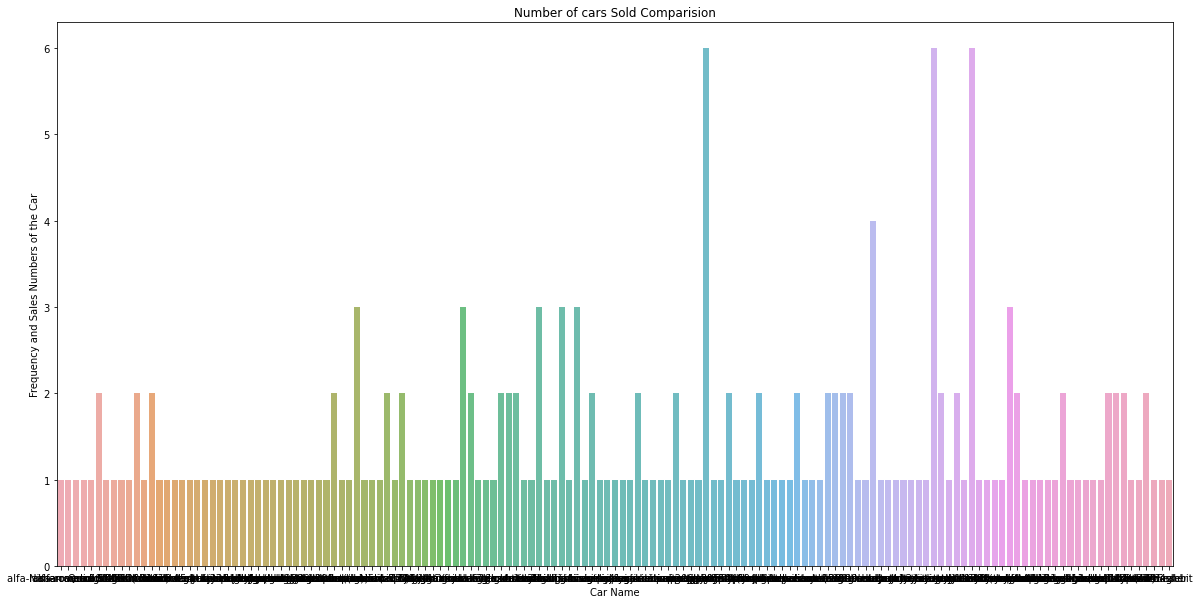

In [10]:
plt.figure(figsize=(20,10))
sns.barplot(CarName_count.index, CarName_count.values,alpha = 0.8)
plt.title('Number of cars Sold Comparision')
plt.ylabel('Frequency and Sales Numbers of the Car')
plt.xlabel('Car Name')
plt.show()


In [11]:
mean_price_CarName = car_sales[['CarName','price']].groupby('CarName', as_index= False).mean()
mean_price_CarName

,CarName,price
0,Nissan versa,5499.0
1,alfa-romero Quadrifoglio,16500.0
2,alfa-romero giulia,13495.0
3,alfa-romero stelvio,16500.0
4,audi 100 ls,13950.0
...,...,...
142,volvo 246,22470.0
143,volvo 264gl,20522.5
144,volvo diesel,18950.0
145,vw dasher,11595.0


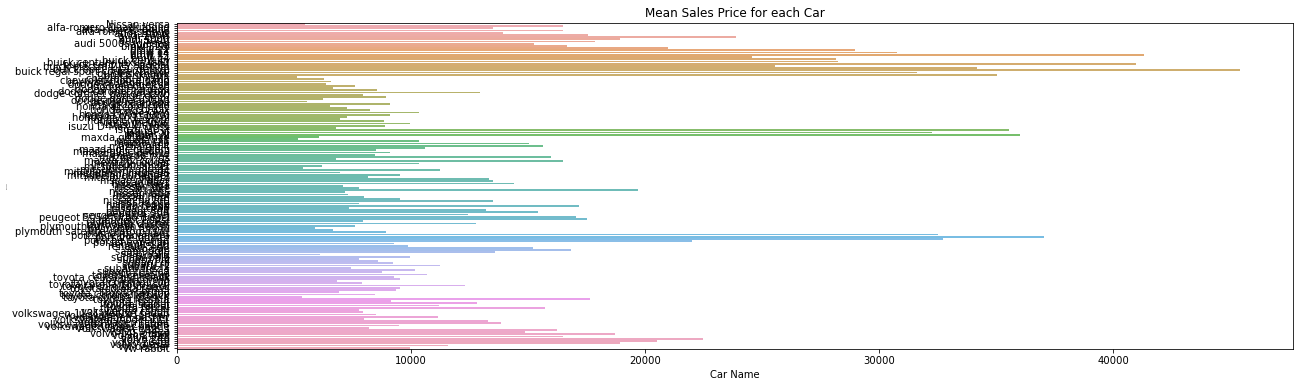

In [12]:
plt.figure(figsize=(20,6))
sns.barplot(mean_price_CarName['price'],mean_price_CarName['CarName'],alpha = 0.8)
plt.title('Mean Sales Price for each Car')
plt.xlabel('Car Name')
plt.ylabel('Mean Price', fontsize=0.2)
plt.show()


In [13]:
type_count = car_sales['symboling'].value_counts(dropna=False)
type_count

0     67
1     54
2     32
3     27
-1    22
-2     3
Name: symboling, dtype: int64

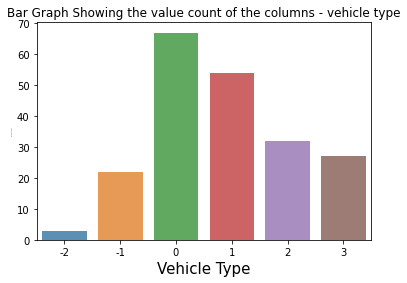

In [14]:
sns.barplot(type_count.index, type_count.values,alpha = 0.8)
plt.title('Bar Graph Showing the value count of the columns - vehicle type')
plt.ylabel('Number of Sales', fontsize = 0.2)
plt.xlabel("Vehicle Type",fontsize=15 )
plt.show()


In [15]:
mean_price_type = car_sales[['symboling','price']].groupby(['symboling'],as_index = False).mean()
mean_price_type

,symboling,price
0,-2,15781.666667
1,-1,17330.681818
2,0,14366.965179
3,1,10037.907407
4,2,10109.281250
5,3,17221.296296


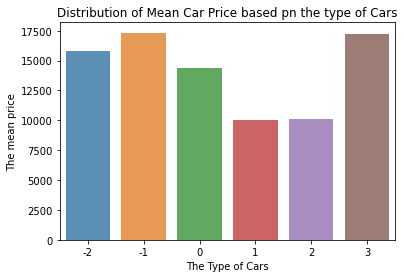

In [16]:
sns.barplot(mean_price_type['symboling'],mean_price_type['price'],alpha = 0.8)
plt.xlabel('The Type of Cars')
plt.ylabel('The mean price')
plt.title('Distribution of Mean Car Price based pn the type of Cars')
plt.show()

Text(0.5, 1.0, 'Distribution of the column - Sales in thousands')

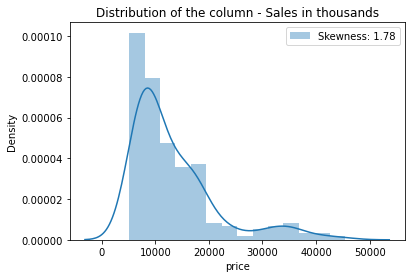

In [17]:
sns.distplot(car_sales['price'], label = 'Skewness: %.2f'%(car_sales['price'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Sales in thousands')

Text(0.5, 1.0, 'Distribution of the column - Variaton in EngineSize')

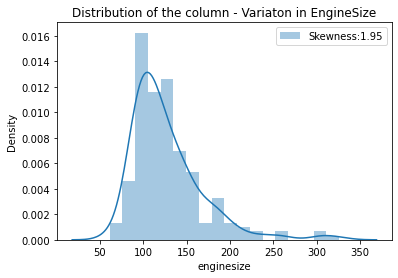

In [18]:
sns.distplot(car_sales['enginesize'],label = 'Skewness:%.2f'%(car_sales['enginesize'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Variaton in EngineSize')

Text(0.5, 1.0, 'Distribution of the column - Variation and Distribution of HorsePower')

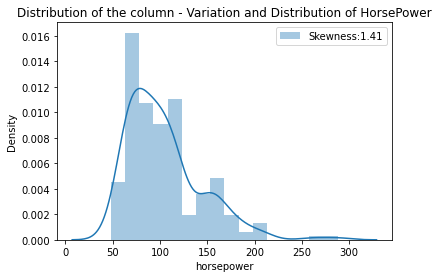

In [19]:
sns.distplot(car_sales['horsepower'],label='Skewness:%.2f'%(car_sales['horsepower'].skew()))
plt.legend(loc ='best')
plt.title('Distribution of the column - Variation and Distribution of HorsePower')

Text(0.5, 1.0, 'Distr of column Highway MPG')

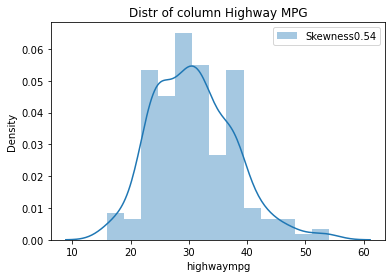

In [20]:
sns.distplot(car_sales['highwaympg'],label='Skewness%.2f'%(car_sales['highwaympg'].skew()))
plt.legend(loc = 'best')
plt.title('Distr of column Highway MPG')

# Conclusions
1. Count and feature analysis help us to visualize the sale and the relationships of various models and type of models sold across a time period as given in the dataset.
2. Since there are various amounts of type of cars hence there is a difficulty on finding conclusive evidence of the correlation between various factors
3. The count of number of cars in the category 0 and 1 are considerably large than the remaining categories
4. Clearly the mean prices of categories -1 and 3 are considerably high as compared to the others and the lowest mean price is seen in category 1 and 2
5. From the above 2 conclusions we can clearly make out that there is a negative correaltion between the sale of the categories and the prices (mean prices) of the respective categories 
6. The skewness of few features have been shown but observing the other characteristics we can make out that all the factors are not completely positively or negatively skewed but rather show a slight symmetrical behaviour other than few deviations.
